# **Central Asia cold spell**

In [1]:
import sys; sys.path.append('/home/clair/wwa')
from wwa import *

## **Identify affected region (CPC)**

In [3]:
# # min temps at suggested timescales
# cpc = xr.open_mfdataset("../../Data/cpc/tmin.*.nc").sel(lat = slice(70,20), lon = slice(50,120)).tmin
# [cpc.rolling(time = n, center = False).mean().resample(time = "AS-JUL", label = "right").min().resample(time = "AS-JAN").mean().to_netcdf("data/cpc_TN"+str(n)+"n_50-120E_20-70N.nc") for n in [1,7,14,30]]

/home/clair/miniconda3/envs/wwa/lib/python3.10/site-packages/dask/array/reductions.py:611: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/home/clair/miniconda3/envs/wwa/lib/python3.10/site-packages/dask/array/reductions.py:611: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/home/clair/miniconda3/envs/wwa/lib/python3.10/site-packages/dask/array/reductions.py:611: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)
/home/clair/miniconda3/envs/wwa/lib/python3.10/site-packages/dask/array/reductions.py:611: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


[None, None, None, None]

### **Spatial & temporal extent**

In [2]:
cpc = xr.concat([xr.open_dataset("data/cpc_TN"+str(n)+"n_50-120E_20-70N.nc").expand_dims(ndays = [n]) for n in [1,7,14,30]], "ndays").tmin
cpc_scaled = ((cpc - cpc.mean("time")) / cpc.std("time")).assign_attrs(long_name = "Standardised anomaly in minimum temperature", units = "SD")

# subregion to look at more closely
sub = [50,90,30,50]

Text(0.5, 0.98, 'Spatial & temporal extent of January 2023 minimum')

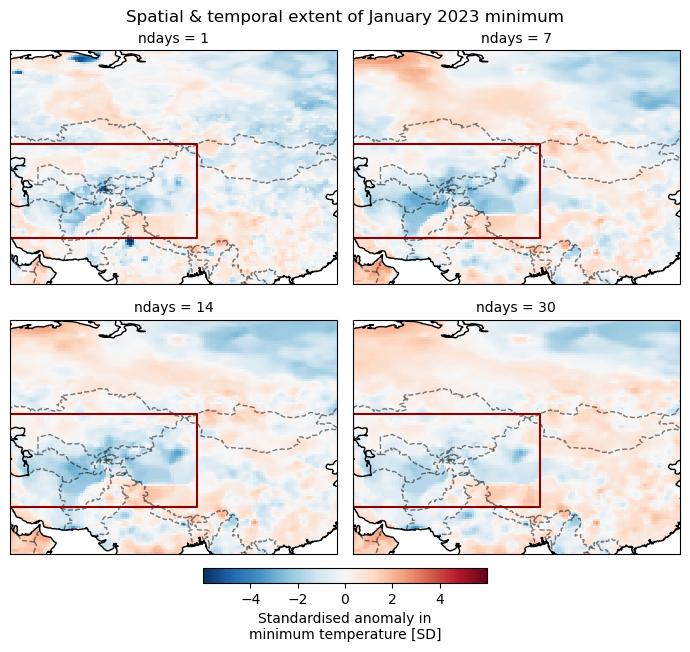

In [3]:
cpc_scaled.sel(time = "2023").plot(col = "ndays", col_wrap = 2, subplot_kws = {"projection" : cartopy.crs.PlateCarree()}, sharey = True, 
                                   cbar_kwargs =  {"location" : "bottom", "fraction" : 0.025, "pad" : 0.025, "shrink" : 0.95})

for ax in plt.gcf().axes[:-1]:
    ax.coastlines(lw = 1)
    ax.add_feature(cartopy.feature.BORDERS, lw = 1, ls = "--", alpha = 0.5)
    
    ax.plot([sub[0],sub[1],sub[1],sub[0],sub[0]], [sub[2],sub[2],sub[3],sub[3],sub[2]], color = "darkred")
    
plt.suptitle("Spatial & temporal extent of January 2023 minimum")

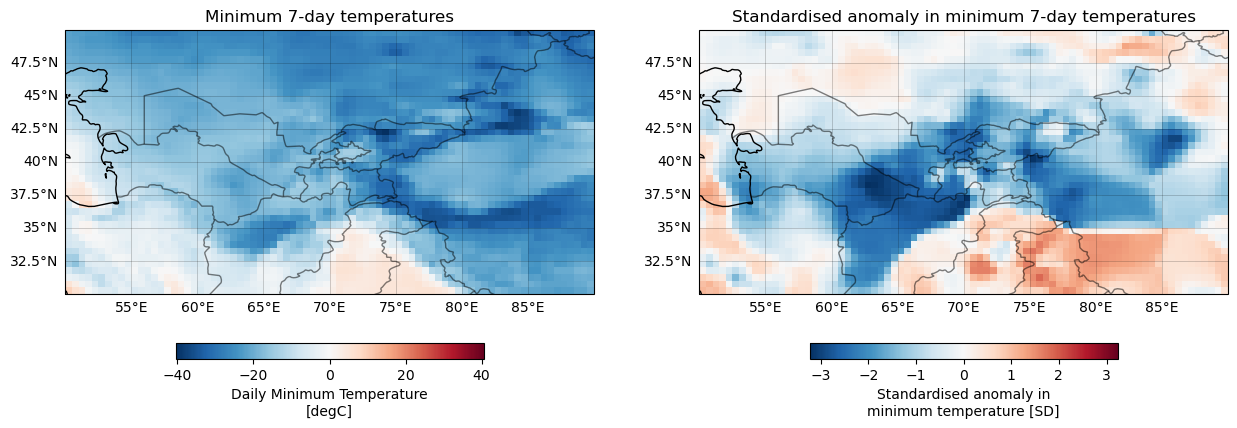

In [4]:
fig, axs = plt.subplots(ncols = 2, figsize = (15,8), subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)

cbar_kwargs =  {"location" : "bottom", "fraction" : 0.025, "pad" : 0.08, "shrink" : 0.95}

cpc.sel(time = "2023", ndays = 7, lat = slice(sub[3],sub[2]), lon = slice(sub[0], sub[1])).plot(ax = axs[0], cbar_kwargs = cbar_kwargs)
cpc_scaled.sel(time = "2023", ndays = 7, lat = slice(sub[3],sub[2]), lon = slice(sub[0], sub[1])).plot(ax = axs[1], cbar_kwargs = cbar_kwargs)

axs[0].set_title("Minimum 7-day temperatures")
axs[1].set_title("Standardised anomaly in minimum 7-day temperatures")

for ax in axs:
    ax.coastlines(lw = 1)
    ax.add_feature(cartopy.feature.BORDERS, lw = 1, alpha = 0.5)
    ax.gridlines(crs=cartopy.crs.PlateCarree(), linewidth=0.5, color='black', draw_labels=["bottom", "left"], alpha=0.25)

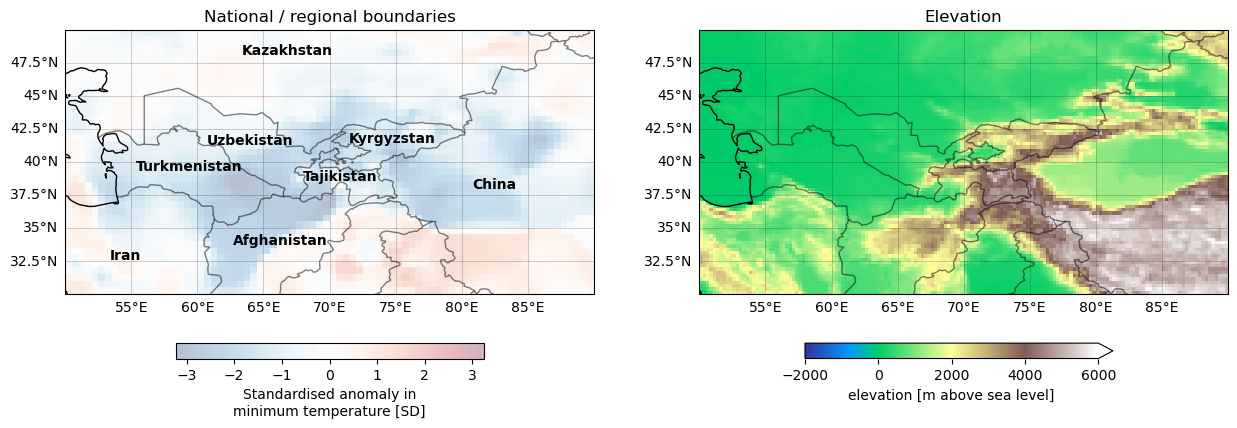

In [6]:
fig, axs = plt.subplots(ncols = 2, figsize = (15,8), subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)

cpc_scaled.sel(time = "2023", ndays = 7, lat = slice(sub[3],sub[2]), lon = slice(sub[0], sub[1])).plot(ax = axs[0],alpha = 0.3, cbar_kwargs = cbar_kwargs)
[axs[0].annotate(ctry, xy = get_latlon(ctry).values(), fontweight = "bold", ha='center') for ctry in ["Afghanistan", "Uzbekistan", "Turkmenistan", "Tajikistan", "Kyrgyzstan", "Kazakhstan", "Iran"]]
axs[0].annotate("China", xy = [82.5, 38], fontweight = "bold", ha='center')

elev = xr.open_dataset("../90_data/tbase_elev-0.25deg.nc").elev.sel(lat = slice(sub[2],sub[3]), lon = slice(sub[0], sub[1]))
elev.plot(ax = axs[1], cmap = "terrain", vmin = -2000, vmax = 6000, cbar_kwargs = cbar_kwargs)

axs[0].set_title("National / regional boundaries")
axs[1].set_title("Elevation")

for ax in axs:
    ax.coastlines(lw = 1)
    ax.add_feature(cartopy.feature.BORDERS, lw = 1, alpha = 0.5)
    ax.gridlines(crs=cartopy.crs.PlateCarree(), linewidth=0.5, color='black', draw_labels=["bottom", "left"], alpha=0.25)

<GeoAxesSubplot: title={'center': 'ndays = 7, time = 2023-01-01'}, xlabel='Longitude [degrees_east]', ylabel='Latitude [degrees_north]'>

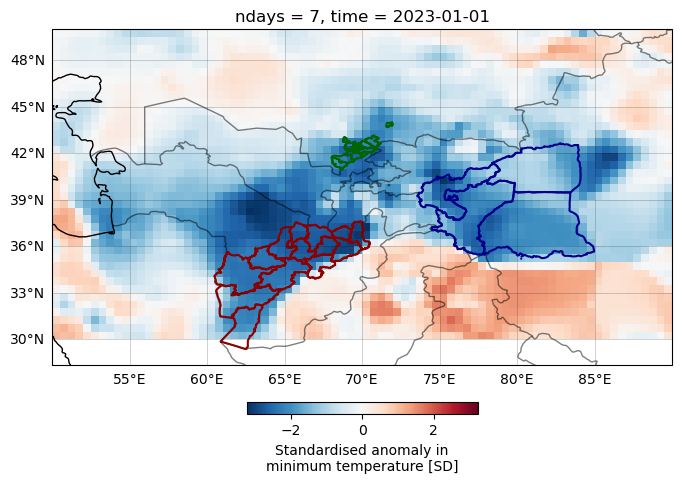

In [7]:
cpc_scaled.sel(time = "2023", ndays = 7, lat = slice(sub[3],sub[2]), lon = slice(sub[0], sub[1])).plot(subplot_kws = {"projection" : cartopy.crs.PlateCarree()}, 
                                              cbar_kwargs =  {"location" : "bottom", "fraction" : 0.025, "pad" : 0.08, "shrink" : 0.95}, figsize = (8,6))

ax = plt.gcf().axes[0]
ax.coastlines(lw = 1)
ax.add_feature(cartopy.feature.BORDERS, lw = 1, alpha = 0.5)
ax.gridlines(crs=cartopy.crs.PlateCarree(), linewidth=0.5, color='black', draw_labels=["bottom", "left"], alpha=0.25)

afg = gpd.read_file("sf/afg_adm1").to_crs(cartopy.crs.PlateCarree())
chn = gpd.read_file("sf/chn_adm2").to_crs(cartopy.crs.PlateCarree()); chn = chn.loc[chn.geometry.centroid.x < 85]
kaz = gpd.read_file("sf/kaz_adm2").to_crs(cartopy.crs.PlateCarree()); kaz = kaz.loc[(kaz.geometry.centroid.y < 44) & (kaz.geometry.centroid.x > 67)]

afg.iloc[[1,2,3,4,6,7,9,11,12,23,29,30,31,18]].boundary.plot(ax = ax, color = "darkred")
chn.loc[[20,21,22,23]].boundary.plot(ax = ax, color = "darkblue")
kaz.loc[(kaz.geometry.centroid.y < 43) & (kaz.geometry.centroid.x < 71) & (kaz.geometry.centroid.x > 68.5)].boundary.plot(ax = ax, color = "darkgreen")

### **How extreme was the event?**
- fit GEV & consider lower tails, or invert & fit GEV?

In [1]:
import sys; sys.path.append('/home/clair/wwa')
from wwa import *
from wwa_nonstationary_fitting import *

In [2]:
sub = [50,90,30,50]
cpc = xr.open_dataset("data/cpc_TN7n_50-120E_20-70N.nc").tmin.sel(lat = slice(sub[3],sub[2]), lon = slice(sub[0], sub[1]))

gmst = pd.read_csv("/home/clair/wwa/90_data/gmst.dat", comment = "#", sep = " .", engine = "python", header = None, names = ["time","gmst"], parse_dates = True, index_col = "time").to_xarray().gmst
gmst = gmst.sel(time = cpc.time)

In [3]:
# print(datetime.now().time())
# cpc_fit = ns_mapfit(gev, "shift", cpc, gmst)
# print(datetime.now().time())
cpc_fit = xr.open_dataset("cpc7-fit.nc")

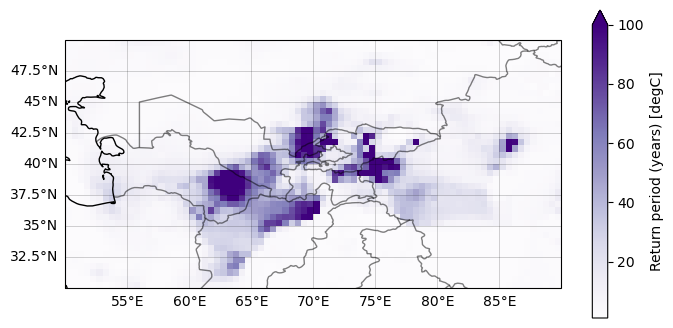

In [4]:
rpmap(cpc_fit.ml_fit, cpc.sel(time = "2023"), gmst.sel(time = "2023"), lower = True).plot(vmax = 100, cmap = "Purples", subplot_kws = {"projection" : cartopy.crs.PlateCarree()}, figsize = (8,4))
ax = plt.gcf().axes[0]
ax.coastlines(lw = 1)
ax.add_feature(cartopy.feature.BORDERS, lw = 1, alpha = 0.5)
ax.gridlines(crs=cartopy.crs.PlateCarree(), linewidth=0.5, color='black', draw_labels=["bottom", "left"], alpha=0.25)

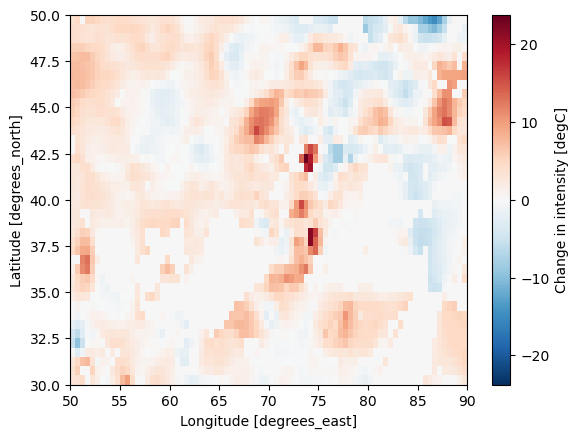

In [11]:
dImap(cpc_fit.ml_fit, rpmap(cpc_fit.ml_fit, cpc.sel(time = "2023"), gmst.sel(time = "2023"), lower = True), gmst.sel(time = "2023"), gmst.sel(time = "2023") - 1.2, lower = True).plot()

### **When was the min temp achieved?**

In [14]:
cpc = xr.open_dataset("../../Data/cpc/tmin.2023.nc").sel(lat = slice(70,20), lon = slice(50,120)).tmin

Text(0.5, 1.0, 'Timing of 2023 minimum temperatures (CPC)')

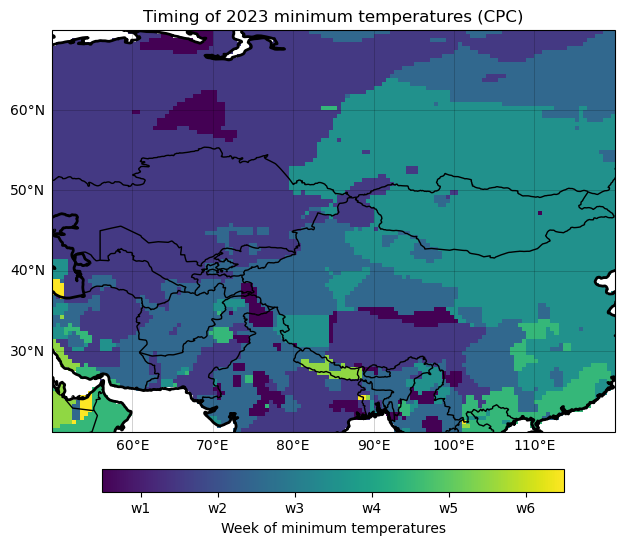

In [56]:
cpcmin_doy = xr.apply_ufunc(np.digitize, cpc.idxmin("time").dt.dayofyear, kwargs={'bins': range(0,49,7)}).where(~np.isnan(cpc.isel(time = 0)))

fig, ax = plt.subplots(figsize = (8,6), subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)
cbar = cpcmin_doy.plot(ax = ax, add_colorbar = False)

cbar_ax = plt.colorbar(cbar, ax = ax, location = "bottom", fraction = 0.05, pad = 0.08, ticks=list([x + 0.5 for x in range(0,7)]), label = "Week of minimum temperatures")
cbar_ax.ax.set_xticklabels(["w" + str(x) for x in range(7)])

ax.coastlines(lw = 2)
ax.add_feature(cartopy.feature.BORDERS, lw = 1)
ax.gridlines(crs=cartopy.crs.PlateCarree(), linewidth=0.5, color='black', draw_labels=["bottom", "left"], alpha=0.25)

plt.title("Timing of 2023 minimum temperatures (CPC)")

## **ERA5**

In [33]:
era5 = xr.open_dataset("data/era5_tmin_daily_50-90E_30-50N_su.nc").tmin
era5_7 = era5.rolling(time = 7).mean().resample(time = "AS-JUL").min()

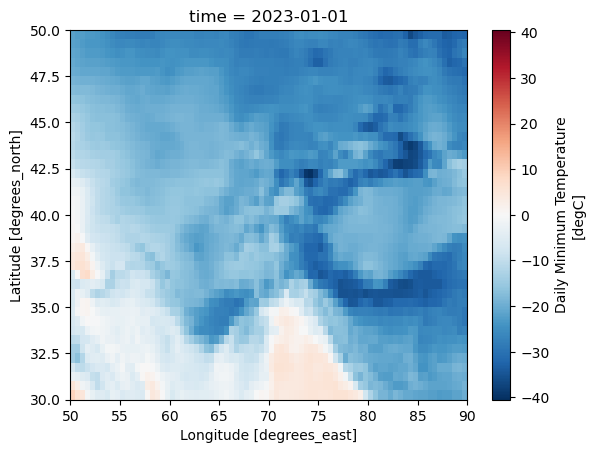

In [35]:
fig, axs = plt.subplots(ncols = 2, figsize = (15,8), subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)

cpc.sel(time = "2023").plot()